# Attack on RO PUF using SVM

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

## Splitting the dataset into training and test set

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4751
1584
4751
1584


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0])
print(y_train[0])

[-0.65818055 -0.13124768]
0


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting classifier to the training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma = 0.001, random_state = 0,decision_function_shape='ovo')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Predicting the test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[791,   0],
       [793,   0]], dtype=int64)

## Checking the Training and Test Set Scores

In [10]:
print("Training score : " + str(classifier.score(X_train,y_train)))
print("Test Score : " + str(classifier.score(X_test,y_test)))

Training score : 0.5007366870132604
Test Score : 0.49936868686868685


## Visualizing the training set results

Text(0.5,1,'SVM Decision Region Boundary')

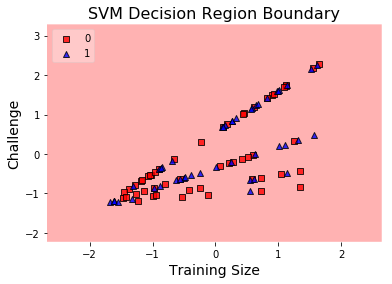

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train[:100], 
                      y=y_train[:100],
                      clf=classifier, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('Training Size', size=14)
plt.ylabel('Challenge', size=14)
plt.title('SVM Decision Region Boundary', size=16)

## Visulaizing the Test Set Results

Text(0.5,1,'SVM Decision Region Boundary')

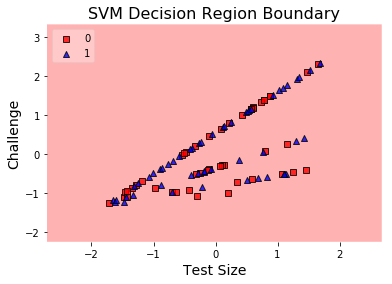

In [15]:
plot_decision_regions(X=X_test[:100], 
                      y=y_test[:100],
                      clf=classifier, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('Test Size', size=14)
plt.ylabel('Challenge', size=14)
plt.title('SVM Decision Region Boundary', size=16)